In [3]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [4]:
normalized = transforms.Normalize((0.5,), (0.5,))
tensor = transforms.ToTensor()
transformation = transforms.Compose([tensor, normalized])

In [5]:
import os

# Define the directory to store the MNIST dataset
data_dir = './data'

# Create the directory if it does not exist
os.makedirs(data_dir, exist_ok=True)

# Load the MNIST dataset
training_dataset = datasets.MNIST(data_dir, download=True, train=True, transform=transformation)
testing_dataset = datasets.MNIST(data_dir, download=True, train=False, transform=transformation)

train_data = torch.utils.data.DataLoader(training_dataset, batch_size=64, shuffle=True)
test_data = torch.utils.data.DataLoader(testing_dataset, batch_size=64, shuffle=True)

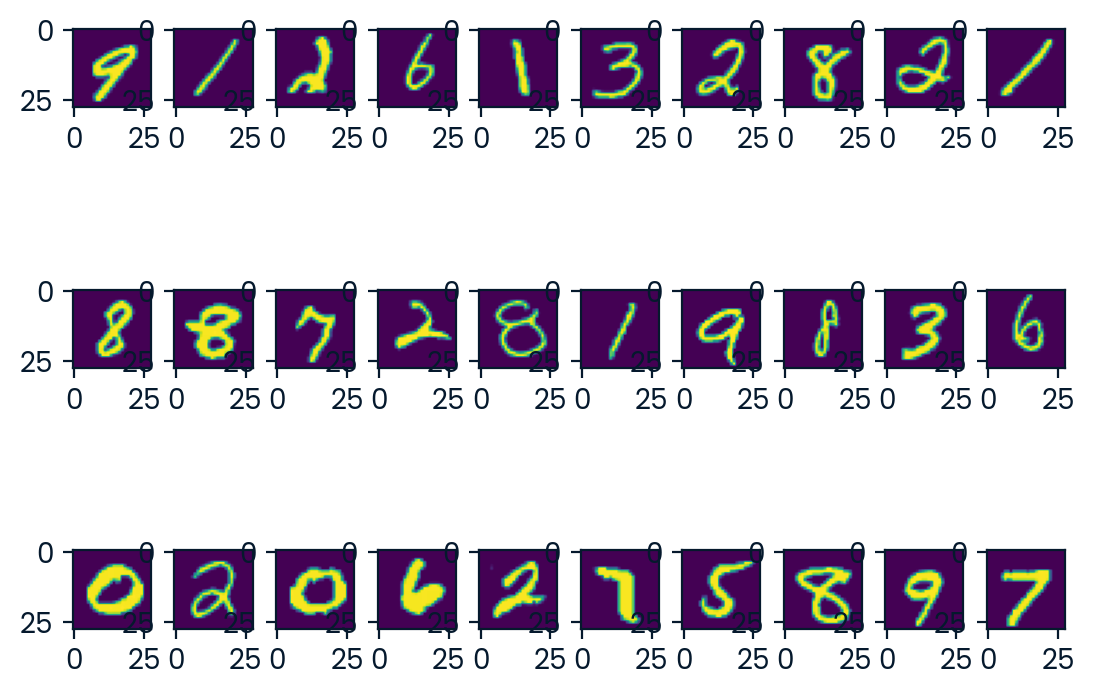

In [6]:
images, labels = next(iter(train_data))
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.subplots_adjust(wspace=0.3)
    plt.imshow(images[i].numpy().squeeze())

In [7]:
input_layer = 784
hidden_layer1 = 64
hidden_layer2 = 32
output_layer = 10

In [8]:
model = nn.Sequential(nn.Linear(input_layer, hidden_layer1),
nn.ReLU(),
nn.Linear(hidden_layer1,hidden_layer2),
nn.ReLU(),
nn.Linear(hidden_layer2, output_layer))

In [9]:
images = images.view(images.shape[0], -1)
outputs = model(images)
lossFunction = nn.CrossEntropyLoss()
loss = lossFunction(outputs, labels)

In [10]:
gradient_descent = optim.SGD(model.parameters(), lr=0.1)

epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_data:
        images = images.view(images.shape[0], -1)
        # Feed-Forward
        gradient_descent.zero_grad()
        loss = lossFunction(model(images), labels)
        # Back Propagation
        loss.backward()
        # Optimize the weights
        gradient_descent.step()
        running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(labels)
    print("Iteration : ", epoch+1, end = "\t")
    print("Loss: ", epoch_loss)

Iteration :  1	Loss:  911.9174335002899
Iteration :  2	Loss:  373.41881066560745
Iteration :  3	Loss:  275.6665437184274
Iteration :  4	Loss:  229.82617319189012
Iteration :  5	Loss:  199.32003217190504
Iteration :  6	Loss:  177.69744888460264
Iteration :  7	Loss:  156.9741542050615
Iteration :  8	Loss:  141.69315405841917
Iteration :  9	Loss:  129.7635920746252
Iteration :  10	Loss:  122.73124857852235


In [11]:
def get_predicted_label(image):
    image = image.view(1, 28*28)
    with torch.no_grad():
        prediction_score = model(image)
    return np.argmax(prediction_score)


images, labels = next(iter(test_data))
print("Predicted label: ", get_predicted_label(images[0]))
print("Actual label: ", labels.numpy()[0])

Predicted label:  tensor(7)
Actual label:  7


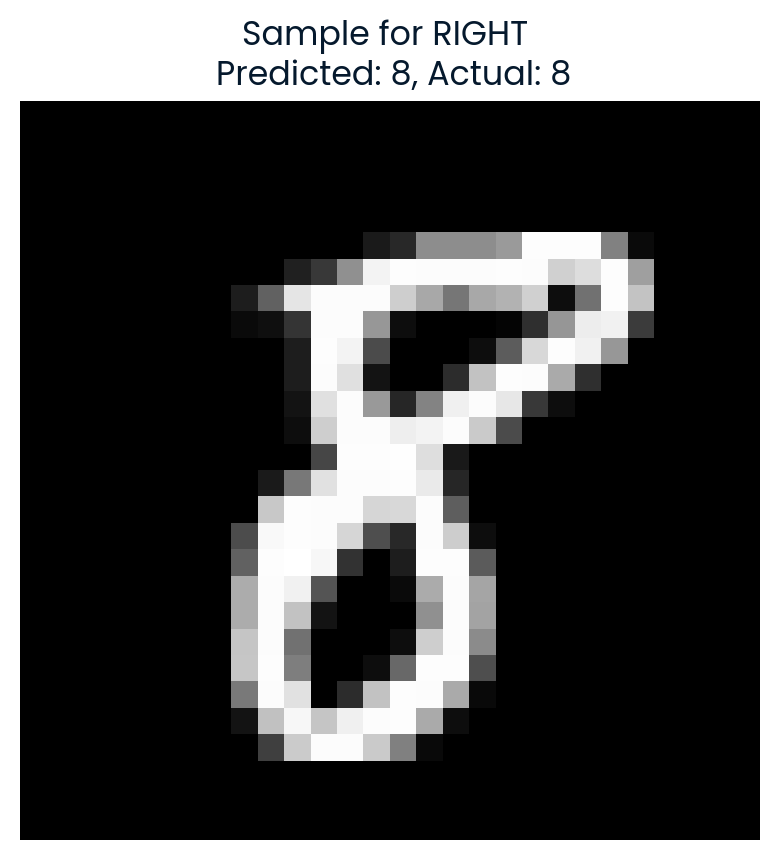

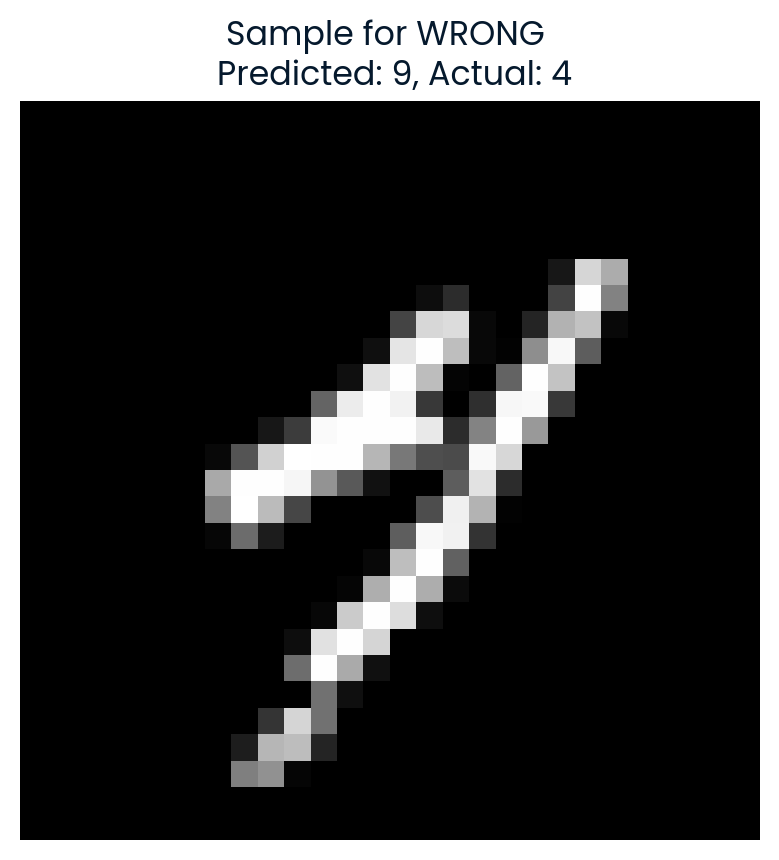

Total images tested: :  10000
Accurate predictions:  9662
Accuracy percentage:  96.61999999999999 %


In [17]:
totalCount = 0
accurateCount = 0
wrong = 0
for images, labels in test_data:
    for i in range(len(labels)):
        predictedLabel = get_predicted_label(images[i])
        actualLabel = labels.numpy()[i]
        # print("Predicted Label: ", predictedLabel, " / Actual Label: ", actualLabel)
        if(predictedLabel == actualLabel):
            accurateCount += 1
            if accurateCount == 1:
                plt.imshow(images[i].squeeze(), cmap='gray')
                plt.title(f"Sample for RIGHT \n Predicted: {predictedLabel}, Actual: {actualLabel}")
                plt.axis('off')
                plt.show()
        else:
            wrong += 1
            if wrong == 1:
                plt.imshow(images[i].squeeze(), cmap='gray')
                plt.title(f"Sample for WRONG \n Predicted: {predictedLabel}, Actual: {actualLabel}")
                plt.axis('off')
                plt.show()
    totalCount += len(labels)
print("Total images tested: : ", totalCount)
print("Accurate predictions: ", accurateCount)
print("Accuracy percentage: ", ((accurateCount/totalCount)*100), "%")